In [7]:
%matplotlib inline
# not sure if necessary

In [8]:
import finetune
import importlib
import torch

In [9]:
# run this cell when you change stuff in the finetune module, and don't want to restart the notebook's kernel.
importlib.reload(finetune)
finetune.structure_checkpoints() # If this prints 'Cannot safely create ...', it means that the folder probably already exists

cannot safely create ../../data\finetuned_models
cannot safely create ../../data\finetuned_models\StanfordCars
cannot safely create ../../data\finetuned_models\StanfordCars\resnet
cannot safely create ../../data\finetuned_models\StanfordCars\alexnet
cannot safely create ../../data\finetuned_models\StanfordCars\vgg
cannot safely create ../../data\finetuned_models\StanfordCars\squeezenet
cannot safely create ../../data\finetuned_models\StanfordCars\densenet
cannot safely create ../../data\finetuned_models\StanfordCars\inception
cannot safely create ../../data\finetuned_models\FGVC-Aircraft
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\resnet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\alexnet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\vgg
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\squeezenet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\densenet
cannot safely create ../../data\finetuned_models\FG

In [10]:
finetune.CLASSIFIER_NAME = 'resnet'
finetune.NUM_EPOCHS = 30
finetune.FEATURE_EXTRACT = False
finetune.DATASET = 'FGVC-Aircraft' # [StanforCars, FGVC-Aircraft]
finetune.print_hypers() # shows params

# Initialize the model for this run
model_ft = finetune.initialize_model(_verbose=False)

classifier input size: None
batch size: 8
num epochs: 30
feature extract: False


In [11]:
model, hist, state = finetune.finetune_model(model_ft, checkpoint_save=10)

  0%|          | 0/417 [00:00<?, ?it/s]

Epoch 0/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 2.5109 Acc: 0.2744


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 1.8285 Acc: 0.4146

Epoch 1/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 1.8852 Acc: 0.4106


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 1.4989 Acc: 0.5263

Epoch 2/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 1.6120 Acc: 0.4934


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 1.2405 Acc: 0.5839

Epoch 3/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 1.3827 Acc: 0.5699


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 1.1723 Acc: 0.6227

Epoch 4/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 1.2172 Acc: 0.6158


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 1.0878 Acc: 0.6496

Epoch 5/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 1.1067 Acc: 0.6482


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 1.0718 Acc: 0.6466

Epoch 6/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 1.0329 Acc: 0.6692


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.9446 Acc: 0.6844

Epoch 7/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.9789 Acc: 0.6896


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 1.0600 Acc: 0.6725

Epoch 8/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.9381 Acc: 0.7019


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8759 Acc: 0.7136

Epoch 9/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.8547 Acc: 0.7358


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8451 Acc: 0.7328

Epoch 10/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.8330 Acc: 0.7256
[CHECKPOINT] ../../data\finetuned_models\FGVC-Aircraft\resnet\resnet_FGVC-Aircraft_E10.pth


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8407 Acc: 0.7393
[CHECKPOINT] ../../data\finetuned_models\FGVC-Aircraft\resnet\resnet_FGVC-Aircraft_E10.pth

Epoch 11/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.7541 Acc: 0.7564


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.9349 Acc: 0.7204

Epoch 12/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.7737 Acc: 0.7537


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8717 Acc: 0.7348

Epoch 13/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.6973 Acc: 0.7777


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7943 Acc: 0.7555

Epoch 14/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.6636 Acc: 0.7861


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8821 Acc: 0.7381

Epoch 15/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.6278 Acc: 0.8029


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8725 Acc: 0.7339

Epoch 16/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.6331 Acc: 0.8053


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8143 Acc: 0.7564

Epoch 17/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.6169 Acc: 0.8041


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 1.0106 Acc: 0.7052

Epoch 18/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.5757 Acc: 0.8236


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7925 Acc: 0.7717

Epoch 19/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.5826 Acc: 0.8152


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8839 Acc: 0.7442

Epoch 20/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.5287 Acc: 0.8332
[CHECKPOINT] ../../data\finetuned_models\FGVC-Aircraft\resnet\resnet_FGVC-Aircraft_E20.pth


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7347 Acc: 0.7742
[CHECKPOINT] ../../data\finetuned_models\FGVC-Aircraft\resnet\resnet_FGVC-Aircraft_E20.pth

Epoch 21/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.5181 Acc: 0.8365


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7721 Acc: 0.7748

Epoch 22/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.5247 Acc: 0.8386


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7696 Acc: 0.7661

Epoch 23/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.4843 Acc: 0.8497


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7201 Acc: 0.7867

Epoch 24/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.4896 Acc: 0.8434


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8493 Acc: 0.7684

Epoch 25/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.5436 Acc: 0.8290


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7581 Acc: 0.7790

Epoch 26/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.4322 Acc: 0.8662


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.8079 Acc: 0.7723

Epoch 27/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.4635 Acc: 0.8599


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7702 Acc: 0.7837

Epoch 28/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.4427 Acc: 0.8578


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7679 Acc: 0.7853

Epoch 29/29
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.4065 Acc: 0.8764


100%|██████████| 834/834 [00:20<00:00, 39.97it/s]

val Loss: 0.8208 Acc: 0.7775

Training complete in 19m 48s
Best val Acc: 0.786679


In [12]:
model_save_path = finetune.format_model_path(finetune.CLASSIFIER_NAME,
                                             finetune.DATASET,
                                             state['epochs'])

finetune.save_model(state, model_save_path)

[CHECKPOINT] ../../data\finetuned_models\FGVC-Aircraft\resnet\resnet_FGVC-Aircraft_E30.pth


In [34]:
# # Loading certain model
# model_props = {
#     'name': 'resnet',
#     'dataset': 'StanfordCars',
#     'epochs': 2
# }
# model_load_path = finetune.format_model_path(model_props['name'],
#                                              model_props['dataset'],
#                                              3)
# ,
# state = torch.load(model_load_path)
# new_model = finetune.get_model_architecture(model_props['name'])
# new_model.load_state_dict(state['model_state_dict'])
# optimizer_state_dict = state['optimizer_state_dict']

In [4]:
# importlib.reload(finetune)

<module 'finetune' from 'C:\\Users\\dylan\\PycharmProjects\\REDI-utwente\\src\\awesome_GNN\\finetune.py'>

In [13]:
model_save_path = finetune.format_model_path(finetune.CLASSIFIER_NAME,
                                             finetune.DATASET,
                                             state['epochs'])

checkpoint = finetune.load_checkpoint(model_save_path)


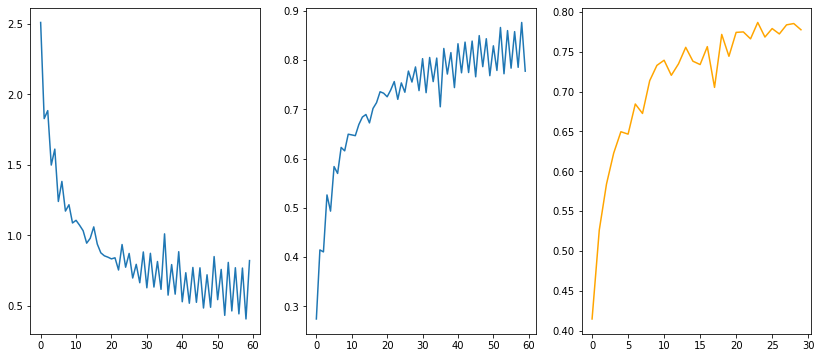

In [14]:
train_acc_history, train_loss_history, val_acc_history = finetune.get_information_from_checkpoint(checkpoint, plot=True)

0